In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
from zipfile import ZipFile
import geopandas as gpd
from shapely.geometry import Point

In [3]:
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'Boundaries - Census Tracts - 2010.zip')
coord_system = {'init': 'epsg:4326'}
chicago_census_tracts = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

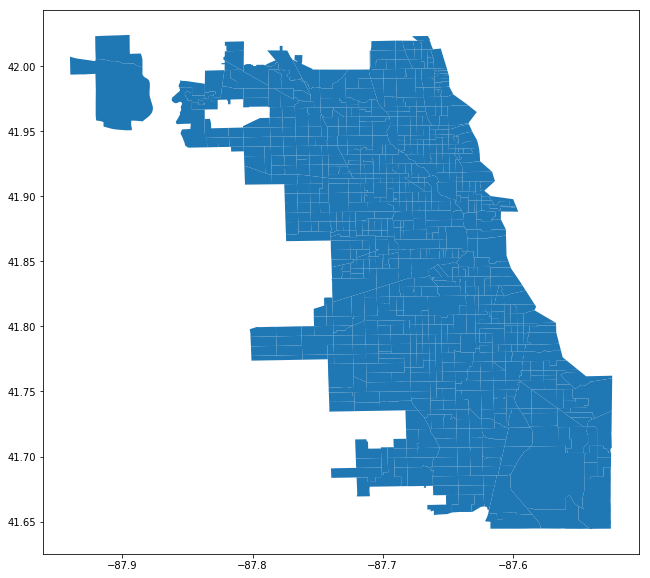

In [5]:
chicago_census_tracts.plot(figsize=(15,10))

In [6]:
chicago_census_tracts.head()

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry
0,17,031,842400,Census Tract 8424,44,17031842400,44.0,8424,None,POLYGON ((-87.62404799998049 41.73021699998396...
1,17,031,840300,Census Tract 8403,59,17031840300,59.0,8403,None,"POLYGON ((-87.6860799999848 41.82295600001154,..."
2,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None,"POLYGON ((-87.62934700001183 41.8527970000265,..."
3,17,031,841200,Census Tract 8412,31,17031841200,31.0,8412,None,POLYGON ((-87.68813499997718 41.85569099999095...
4,17,031,838200,Census Tract 8382,28,17031838200,28.0,8382,None,"POLYGON ((-87.66781999997529 41.8741839999791,..."


In [7]:
ZIP_PATH = os.path.join('data', 'ACS_15_5YR_DP05.zip') 
with ZipFile(ZIP_PATH) as zip_file:
    with zip_file.open('ACS_15_5YR_DP05_with_ann.csv') as my_zipped_csv:
        il_acs_15 = pd.read_csv(my_zipped_csv, header=1)

il_acs_15.head()

,Id,Id2,Geography,Estimate; SEX AND AGE - Total population,Margin of Error; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Percent Margin of Error; SEX AND AGE - Total population,Estimate; SEX AND AGE - Total population - Male,Margin of Error; SEX AND AGE - Total population - Male,Percent; SEX AND AGE - Total population - Male,Percent Margin of Error; SEX AND AGE - Total population - Male,Estimate; SEX AND AGE - Total population - Female,Margin of Error; SEX AND AGE - Total population - Female,Percent; SEX AND AGE - Total population - Female,Percent Margin of Error; SEX AND AGE - Total population - Female,Estimate; SEX AND AGE - Under 5 years,Margin of Error; SEX AND AGE - Under 5 years,Percent; SEX AND AGE - Under 5 years,Percent Margin of Error; SEX AND AGE - Under 5 years,Estimate; SEX AND AGE - 5 to 9 years,Margin of Error; SEX AND AGE - 5 to 9 years,Percent; SEX AND AGE - 5 to 9 years,Percent Margin of Error; SEX AND AGE - 5 to 9 years,Estimate; SEX AND AGE - 10 to 14 years,Margin of Error; SEX AND AGE - 10 to 14 years,Percent; SEX AND AGE - 10 to 14 years,Percent Margin of Error; SEX AND AGE - 10 to 14 years,Estimate; SEX AND AGE - 15 to 19 years,Margin of Error; SEX AND AGE - 15 to 19 years,Percent; SEX AND AGE - 15 to 19 years,Percent Margin of Error; SEX AND AGE - 15 to 19 years,Estimate; SEX AND AGE - 20 to 24 years,Margin of Error; SEX AND AGE - 20 to 24 years,Percent; SEX AND AGE - 20 to 24 years,Percent Margin of Error; SEX AND AGE - 20 to 24 years,Estimate; SEX AND AGE - 25 to 34 years,Margin of Error; SEX AND AGE - 25 to 34 years,Percent; SEX AND AGE - 25 to 34 years,Percent Margin of Error; SEX AND AGE - 25 to 34 years,Estimate; SEX AND AGE - 35 to 44 years,Margin of Error; SEX AND AGE - 35 to 44 years,Percent; SEX AND AGE - 35 to 44 years,Percent Margin of Error; SEX AND AGE - 35 to 44 years,Estimate; SEX AND AGE - 45 to 54 years,Margin of Error; SEX AND AGE - 45 to 54 years,Percent; SEX AND AGE - 45 to 54 years,Percent Margin of Error; SEX AND AGE - 45 to 54 years,Estimate; SEX AND AGE - 55 to 59 years,Margin of Error; SEX AND AGE - 55 to 59 years,Percent; SEX AND AGE - 55 to 59 years,Percent Margin of Error; SEX AND AGE - 55 to 59 years,Estimate; SEX AND AGE - 60 to 64 years,Margin of Error; SEX AND AGE - 60 to 64 years,Percent; SEX AND AGE - 60 to 64 years,Percent Margin of Error; SEX AND AGE - 60 to 64 years,Estimate; SEX AND AGE - 65 to 74 years,Margin of Error; SEX AND AGE - 65 to 74 years,Percent; SEX AND AGE - 65 to 74 years,Percent Margin of Error; SEX AND AGE - 65 to 74 years,Estimate; SEX AND AGE - 75 to 84 years,Margin of Error; SEX AND AGE - 75 to 84 years,Percent; SEX AND AGE - 75 to 84 years,Percent Margin of Error; SEX AND AGE - 75 to 84 years,Estimate; SEX AND AGE - 85 years and over,Margin of Error; SEX AND AGE - 85 years and over,Percent; SEX AND AGE - 85 years and over,Percent Margin of Error; SEX AND AGE - 85 years and over,Estimate; SEX AND AGE - Median age (years),Margin of Error; SEX AND AGE - Median age (years),Percent; SEX AND AGE - Median age (years),Percent Margin of Error; SEX AND AGE - Median age (years),Estimate; SEX AND AGE - 18 years and over,Margin of Error; SEX AND AGE - 18 years and over,Percent; SEX AND AGE - 18 years and over,Percent Margin of Error; SEX AND AGE - 18 years and over,Estimate; SEX AND AGE - 21 years and over,Margin of Error; SEX AND AGE - 21 years and over,Percent; SEX AND AGE - 21 years and over,Percent Margin of Error; SEX AND AGE - 21 years and over,Estimate; SEX AND AGE - 62 years and over,Margin of Error; SEX AND AGE - 62 years and over,Percent; SEX AND AGE - 62 years and over,Percent Margin of Error; SEX AND AGE - 62 years and over,Estimate; SEX AND AGE - 65 years and over,Margin of Error; SEX AND AGE - 65 years and over,Percent; SEX AND AGE - 65 years and over,Percent Margin of Error; SEX AND AGE - 65 years and over,Estimate; SEX AND AGE - 18 years and over.1,Margin of Error; SEX AND AGE - 18 years and over.1,Percent; SEX AND A

In [8]:
one_race_cols = []
for col_name in il_acs_15.columns.tolist():
    if ("One race" in col_name) & ("Percent;" in col_name):
        one_race_cols.append(col_name)

In [9]:
one_race_cols

['Percent; RACE - Total population - One race',
 'Percent; RACE - One race',
 'Percent; RACE - One race - White',
 'Percent; RACE - One race - Black or African American',
 'Percent; RACE - One race - American Indian and Alaska Native',
 'Percent; RACE - One race - American Indian and Alaska Native - Cherokee tribal grouping',
 'Percent; RACE - One race - American Indian and Alaska Native - Chippewa tribal grouping',
 'Percent; RACE - One race - American Indian and Alaska Native - Navajo tribal grouping',
 'Percent; RACE - One race - American Indian and Alaska Native - Sioux tribal grouping',
 'Percent; RACE - One race - Asian',
 'Percent; RACE - One race - Asian - Asian Indian',
 'Percent; RACE - One race - Asian - Chinese',
 'Percent; RACE - One race - Asian - Filipino',
 'Percent; RACE - One race - Asian - Japanese',
 'Percent; RACE - One race - Asian - Korean',
 'Percent; RACE - One race - Asian - Vietnamese',
 'Percent; RACE - One race - Asian - Other Asian',
 'Percent; RACE - One 

In [10]:
race_df = il_acs_15[['Id2', 
                     'Percent; RACE - One race',
                     'Percent; RACE - One race - White', 
                     'Percent; RACE - One race - Black or African American', 
                     'Percent; RACE - One race - Asian', 
                     'Percent; RACE - One race - Some other race']].copy()

In [11]:
race_df.head()

,Id2,Percent; RACE - One race,Percent; RACE - One race - White,Percent; RACE - One race - Black or African American,Percent; RACE - One race - Asian,Percent; RACE - One race - Some other race
0,17031010100,97.2,53.2,38.6,3.8,1.6
1,17031010201,96.4,46.9,45.6,3.1,0.6
2,17031010202,97.0,51.1,29.3,8.0,8.0
3,17031010300,97.3,57.2,25.4,12.4,2.1
4,17031010400,96.5,74.7,13.2,6.7,1.9


In [12]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'Boundaries - Census Tracts - 2010.zip')
coord_system = {'init': 'epsg:4326'}
chicago_census_tracts = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

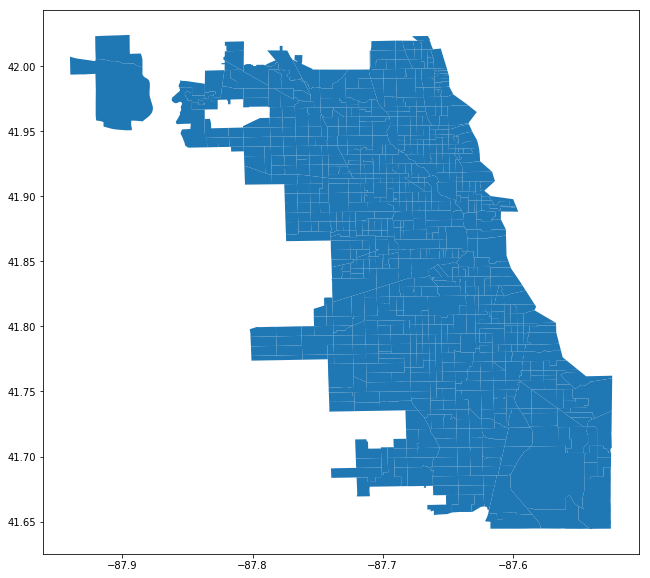

In [15]:
chicago_census_tracts.plot(figsize=(15,10))

In [14]:
chicago_census_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
statefp10     801 non-null object
countyfp10    801 non-null object
tractce10     801 non-null object
namelsad10    801 non-null object
commarea      801 non-null object
geoid10       801 non-null object
commarea_n    801 non-null float64
name10        801 non-null object
notes         12 non-null object
geometry      801 non-null object
dtypes: float64(1), object(9)
memory usage: 62.7+ KB


In [16]:
race_df['Id2'] = race_df['Id2'].astype(str)

In [17]:
chicago_race = pd.merge(left=chicago_census_tracts, right=race_df, left_on='geoid10', right_on='Id2')
chicago_race.head()

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry,Id2,Percent; RACE - One race,Percent; RACE - One race - White,Percent; RACE - One race - Black or African American,Percent; RACE - One race - Asian,Percent; RACE - One race - Some other race
0,17,031,842400,Census Tract 8424,44,17031842400,44.0,8424,None,POLYGON ((-87.62404799998049 41.73021699998396...,17031842400,100.0,0.0,100.0,0.0,0.0
1,17,031,840300,Census Tract 8403,59,17031840300,59.0,8403,None,"POLYGON ((-87.6860799999848 41.82295600001154,...",17031840300,95.4,49.4,3.8,20.1,18.6
2,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None,"POLYGON ((-87.62934700001183 41.8527970000265,...",17031841100,96.3,3.3,4.5,88.1,0.4
3,17,031,841200,Census Tract 8412,31,17031841200,31.0,8412,None,POLYGON ((-87.68813499997718 41.85569099999095...,17031841200,98.2,51.8,3.9,0.4,42.0
4,17,031,838200,Census Tract 8382,28,17031838200,28.0,8382,None,"POLYGON ((-87.66781999997529 41.8741839999791,...",17031838200,96.6,53.6,23.3,15.2,4.4


In [18]:
chicago_race[chicago_race['Percent; RACE - One race - Asian'] == '-']

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry,Id2,Percent; RACE - One race,Percent; RACE - One race - White,Percent; RACE - One race - Black or African American,Percent; RACE - One race - Asian,Percent; RACE - One race - Some other race
85,17,031,980100,Census Tract 9801,56,17031980100,56.0,9801,Half in CA 64 (Midway Airport),POLYGON ((-87.73789600001243 41.78578500000872...,17031980100,-,-,-,-,-
414,17,031,381700,Census Tract 3817,38,17031381700,38.0,3817,None,POLYGON ((-87.62798399996935 41.80191199998851...,17031381700,-,-,-,-,-
667,17,031,980000,Census Tract 9800,76,17031980000,76.0,9800,Partially outside City Boundary (O'Hare),POLYGON ((-87.92062799997296 42.00453199998842...,17031980000,-,-,-,-,-


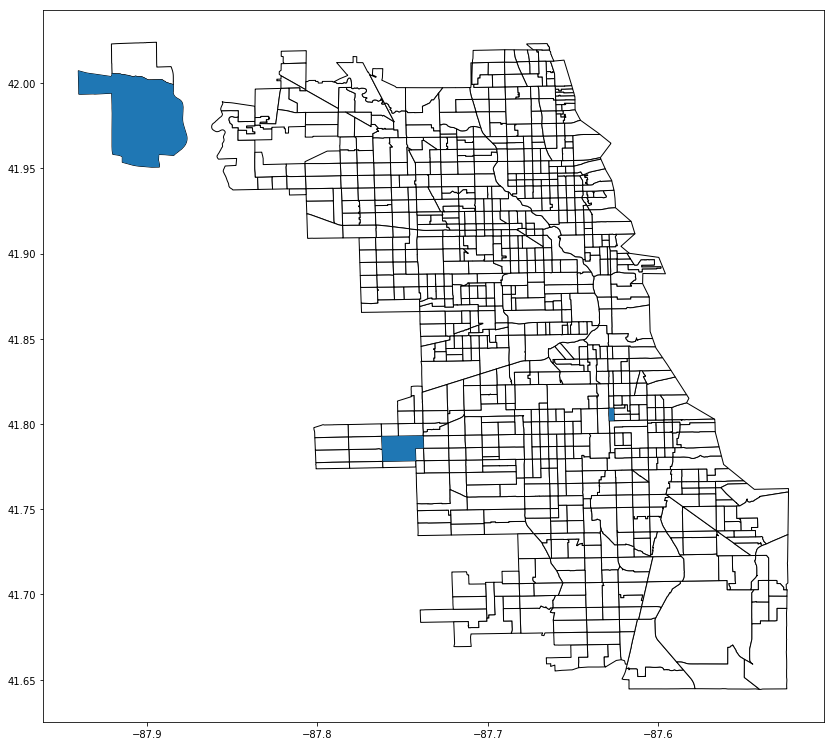

In [19]:
ax = chicago_race.plot(color='white', edgecolor='black', figsize=(14,14))
chicago_race[chicago_race['Id2'].isin(['17031980100', '17031381700', '17031980000'])].plot(ax=ax)

In [20]:
zero_inds = chicago_race[chicago_race['Id2'].isin(['17031980100', '17031381700', '17031980000'])].index.tolist()
for col in chicago_race.columns:
    if "Percent;" in col:
        chicago_race.loc[zero_inds, col] = 0

In [21]:
# Coercing these demographic features to the 'float' type
for col in chicago_race.columns:
    if "Percent;" in col:
        chicago_race[col] = chicago_race[col].astype(float)

# Mapping

Now that we have data in the correct format with the correct type, we can start mapping out some features of interest. I'm not sure if a red-orange color scale is best for this data, but it's certainly striking.

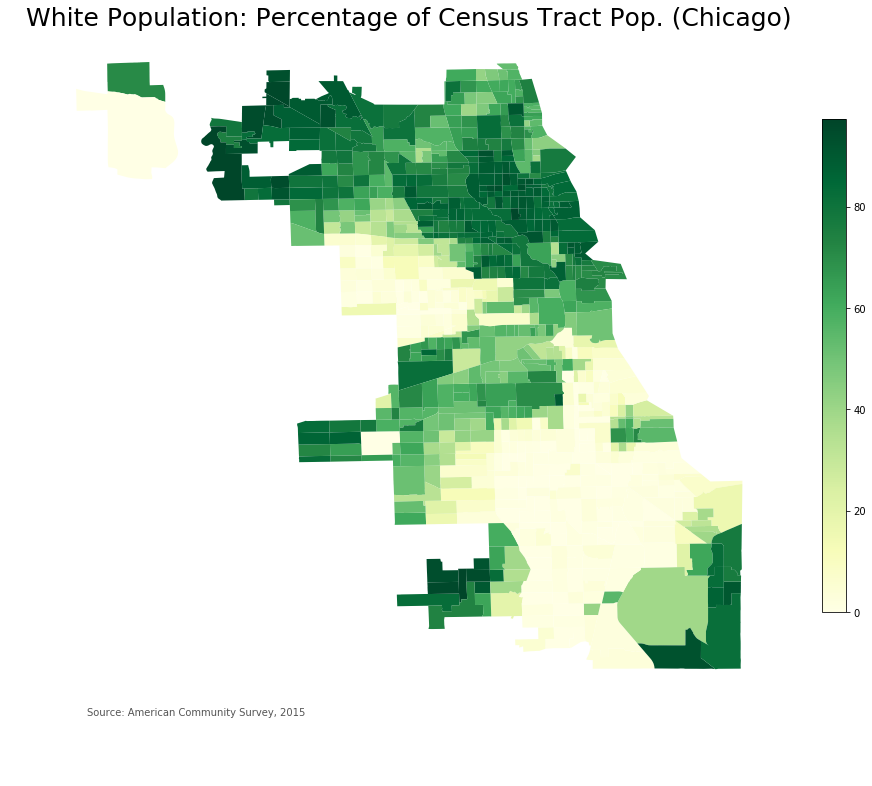

In [22]:
fig, ax = plt.subplots(figsize=(14,14))
my_cmap='YlGn'
race_col = 'Percent; RACE - One race - White'
vmin = chicago_race[race_col].min()
vmax = chicago_race[race_col].max()

_ = chicago_race.plot(column=race_col, 
                      cmap=my_cmap, ax=ax)
_ = ax.axis('off')
_ = ax.set_title("White Population: Percentage of Census Tract Pop. (Chicago)", 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
_ = ax.annotate('Source: American Community Survey, 2015',
                xy=(0.1, .1), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
plt.tight_layout()

In [39]:
col_names = il_acs_15.columns.tolist()

In [ ]:
# col_names

In [16]:
cols = []
for col_name in col_names:
    if "Margin of Error" not in col_name:
        cols.append(col_name)

In [18]:
len(cols)

171

In [38]:
# cols

In [36]:
53.2+38.6+3.8+11.6-2.8

104.4

In [80]:
race_df = il_acs_15[['Id2', 
           'Percent; RACE - One race - White', 
           'Percent; RACE - One race - Black or African American', 
           'Percent; RACE - One race - Asian', 
           'Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race)']].copy()

In [28]:
hisp_cols = []
for col_name in col_names:
    if "Percent; HISPANIC OR LATINO AND RACE" in col_name:
        hisp_cols.append(col_name)

In [29]:
hisp_cols

['Percent; HISPANIC OR LATINO AND RACE - Total population',
 'Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race)',
 'Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race) - Mexican',
 'Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race) - Puerto Rican',
 'Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race) - Cuban',
 'Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race) - Other Hispanic or Latino',
 'Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino',
 'Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - White alone',
 'Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Black or African American alone',
 'Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - American Indian a

In [31]:
il_acs_15[hisp_cols]

,Percent; HISPANIC OR LATINO AND RACE - Total population,Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race),Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race) - Mexican,Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race) - Puerto Rican,Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race) - Cuban,Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race) - Other Hispanic or Latino,Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino,Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - White alone,Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Black or African American alone,Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - American Indian and Alaska Native alone,Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Asian alone,Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Native Hawaiian and Other Pacific Islander alone,Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Some other race alone,Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Two or more races,Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Two or more races - Two races including Some other race,"Percent; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino - Two or more races - Two races excluding Some other race, and Three or more races",Percent; HISPANIC OR LATINO AND RACE - Total housing units
0,4106,11.6,6.6,2.8,0.0,2.2,88.4,44.6,37.0,0.0,3.8,0.0,0.3,2.8,0.3,2.4,(X)
1,7229,27.5,24.1,0.7,1.4,1.2,72.5,21.3,45.6,0.4,3.1,0.0,0.2,2.0,0.0,2.0,(X)
2,2304,26.4,18.6,2.2,0.7,5.0,73.6,35.5,28.1,0.0,7.7,0.0,0.0,2.3,0.8,1.5,(X)
3,6077,16.1,10.7,0.8,1.0,3.7,83.9,45.5,24.3,0.1,12.4,0.0,0.0,1.6,0.0,1.6,(X)
4,5011,8.3,5.8,0.5,0.7,1.3,91.7,69.2,12.2,0.0,6.5,0.0,0.7,3.0,0.9,2.1,(X)
5,3837,6.1,2.8,1.8,1.4,0.0,93.9,59.5,27.1,0.0,2.4,0.0,0.0,4.9,0.0,4.9,(X)
6,3413,14.9,10.3,1.1,0.4,3.1,85.1,52.3,16.9,0.0,13.9,0.0,0.0,2.0,0.6,1.3,(X)
7,2080,16.6,14.0,0.0,0.0,2.6,83.4,53.8,7.5,0.0,16.2,0.0,0.0,5.8,2.0,3.8,(X)
8,6558,27.1,14.3,2.3,3.7,6.8,72.9,41.6,25.9,0.0,2.2,0.0,0.2,2.9,0.0,2.9,(X)
9,3999,38.5,33.4,0.5,0.0,4.7,61.5,33.4,17.7,0.0,7.6,0.0,0.4,2.5,0.0,2.5,(X)


In [40]:
CSV_PATH = os.path.join('data', 'hacknight_ticket_sample_data_2015.csv')
df = pd.read_csv(CSV_PATH,low_memory=False, parse_dates=['issue_date', 'ticket_queue_date'])

In [42]:
CSV_PATH = os.path.join('data', 'hacknight_sample_data_geocode_cleaned.csv')
addrs_df = pd.read_csv(CSV_PATH)

In [43]:
geocoded_df = pd.merge(left=df, right=addrs_df, how='inner', on='address')
geocoded_df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986
1,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986
2,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986
3,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986
4,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986


In [44]:
point_maker = lambda x: Point(x['lng'], x['lat'])

In [47]:
geocoded_df['geometry'] = geocoded_df.apply(point_maker, axis=1)

In [48]:
def assign_census_tracts(df, shape_df):
    """Joins DataFrame with region shapefile.
    This function takes a DataFrame containing latitude and longitude values and
    a GeopandasDataFrame that describes regions that those lat-long pairs are sorted
    into. This should facilitate pairing with Census data that can introduce other
    features like racial demographics.
    Parameters
    ----------
    df : pandas.DataFrame or dask.DataFrame
        DataFrame containing latitudes, longitudes, and location_id columns.
    shape_df:    a GeopandasDataFrame containing regions to map to.
        Name of series to return. 
    """

    # make a copy since we will modify lats and lons
    localdf = df.copy()
    localdf['lng'] = localdf['lng'].fillna(value=0.)
    localdf['lat'] = localdf['lat'].fillna(value=0.)
    
    shape_df = shape_df.to_crs({'init': 'epsg:4326'})

    try:
        local_gdf = gpd.GeoDataFrame(
            localdf, crs={'init': 'epsg:4326'},
            geometry=[Point(xy) for xy in zip(localdf['lng'], localdf['lat'])]
        )

        local_gdf = gpd.sjoin(local_gdf, shape_df, how='left', op='within')

        return local_gdf
    except ValueError as ve:
        print(ve)
        print(ve.stacktrace())
        series = localdf['lng']
        series = np.nan
        return series

In [49]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'Boundaries - Census Tracts - 2010.zip')
coord_system = {'init': 'epsg:4326'}
chicago_census_tracts = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

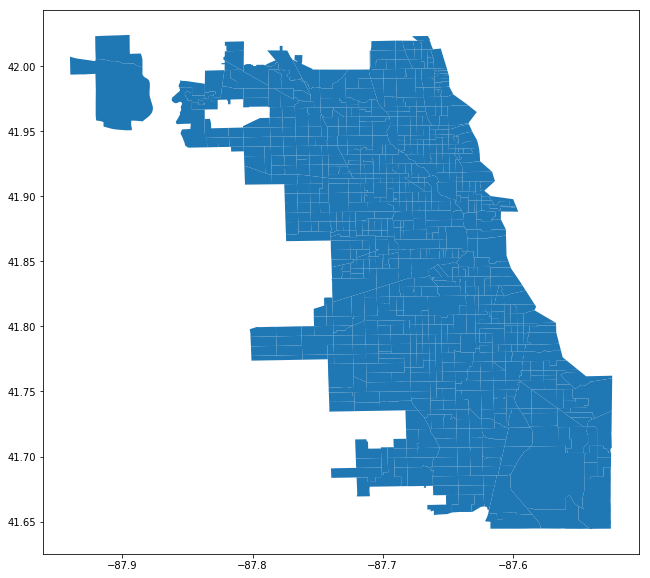

In [50]:
chicago_census_tracts.plot(figsize=(15,10))

In [51]:
full_df = assign_census_tracts(geocoded_df, chicago_census_tracts)

In [53]:
full_df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,lat,lng,geometry,index_right,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None
1,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None
2,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None
3,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None
4,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,BUIC,50,100,0.0,50.0,Paid,2015-05-13,NaN,NaN,0,798,"2100 s archer av, chicago, il",41.854262,-87.631986,POINT (-87.63198586874586 41.85426174412816),2.0,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None


In [64]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 5 columns):
Id2                                                                                           1320 non-null int64
Percent; RACE - One race - White                                                              1320 non-null object
Percent; RACE - One race - Black or African American                                          1320 non-null object
Percent; RACE - One race - Asian                                                              1320 non-null object
Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race)    1320 non-null object
dtypes: int64(1), object(4)
memory usage: 51.6+ KB


In [72]:
race_df.head()

,Id2,Percent; RACE - One race - White,Percent; RACE - One race - Black or African American,Percent; RACE - One race - Asian,Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race)
0,17031010100,53.2,38.6,3.8,11.6
1,17031010201,46.9,45.6,3.1,27.5
2,17031010202,51.1,29.3,8.0,26.4
3,17031010300,57.2,25.4,12.4,16.1
4,17031010400,74.7,13.2,6.7,8.3


In [81]:
race_df.loc['Id2'] = race_df['Id2'].astype(str)

In [117]:
race_df[race_df['Id2'].isnull()]

,Id2,Percent; RACE - One race - White,Percent; RACE - One race - Black or African American,Percent; RACE - One race - Asian,Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race)
Id2,NaN,NaN,NaN,NaN,NaN


In [118]:
race_df.drop(index=['Id2'], inplace=True)

In [119]:
race_df[race_df['Id2'].isnull()]

,Id2,Percent; RACE - One race - White,Percent; RACE - One race - Black or African American,Percent; RACE - One race - Asian,Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race)


In [120]:
race_df['Id2'] = race_df['Id2'].astype(str)

In [121]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 1319
Data columns (total 5 columns):
Id2                                                                                           1320 non-null object
Percent; RACE - One race - White                                                              1320 non-null object
Percent; RACE - One race - Black or African American                                          1320 non-null object
Percent; RACE - One race - Asian                                                              1320 non-null object
Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race)    1320 non-null object
dtypes: object(5)
memory usage: 61.9+ KB


In [109]:
chicago_census_tracts['geoid10'] = chicago_census_tracts['geoid10'].astype(str)

In [123]:
chicago_census_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
statefp10     801 non-null object
countyfp10    801 non-null object
tractce10     801 non-null object
namelsad10    801 non-null object
commarea      801 non-null object
geoid10       801 non-null object
commarea_n    801 non-null float64
name10        801 non-null object
notes         12 non-null object
geometry      801 non-null object
dtypes: float64(1), object(9)
memory usage: 62.7+ KB


In [124]:
chicago_census_tracts[chicago_census_tracts['geoid10'] == '17031010100']

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry
339,17,031,010100,Census Tract 101,1,17031010100,1.0,101,None,POLYGON ((-87.66368000002299 42.01939800001483...


In [127]:
pd.merge(left=chicago_census_tracts, right=race_df, left_on='geoid10', right_on='Id2', how='left') 

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry,Id2,Percent; RACE - One race - White,Percent; RACE - One race - Black or African American,Percent; RACE - One race - Asian,Percent; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race)
0,17,031,842400,Census Tract 8424,44,17031842400,44.0,8424,None,POLYGON ((-87.62404799998049 41.73021699998396...,NaN,NaN,NaN,NaN,NaN
1,17,031,840300,Census Tract 8403,59,17031840300,59.0,8403,None,"POLYGON ((-87.6860799999848 41.82295600001154,...",NaN,NaN,NaN,NaN,NaN
2,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None,"POLYGON ((-87.62934700001183 41.8527970000265,...",NaN,NaN,NaN,NaN,NaN
3,17,031,841200,Census Tract 8412,31,17031841200,31.0,8412,None,POLYGON ((-87.68813499997718 41.85569099999095...,NaN,NaN,NaN,NaN,NaN
4,17,031,838200,Census Tract 8382,28,17031838200,28.0,8382,None,"POLYGON ((-87.66781999997529 41.8741839999791,...",NaN,NaN,NaN,NaN,NaN
5,17,031,650301,Census Tract 6503.01,65,17031650301,65.0,6503.01,None,POLYGON ((-87.73706400002477 41.77120399998377...,NaN,NaN,NaN,NaN,NaN
6,17,031,530503,Census Tract 5305.03,53,17031530503,53.0,5305.03,None,POLYGON ((-87.64386399998179 41.66321000002088...,NaN,NaN,NaN,NaN,NaN
7,17,031,760803,Census Tract 7608.03,76,17031760803,76.0,7608.03,None,POLYGON ((-87.83844200004106 41.97019999997084...,NaN,NaN,NaN,NaN,NaN
8,17,031,540102,Census Tract 5401.02,54,17031540102,54.0,5401.02,None,"POLYGON ((-87.6188529999847 41.65641699997538,...",NaN,NaN,NaN,NaN,NaN
9,17,031,540101,Census Tract 5401.01,54,17031540101,54.0,5401.01,None,POLYGON ((-87.61891699998056 41.65640000000292...,NaN,NaN,NaN,NaN,NaN


In [57]:
chicago_census_tracts.head()

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry
0,17,031,842400,Census Tract 8424,44,17031842400,44.0,8424,None,POLYGON ((-87.62404799998049 41.73021699998396...
1,17,031,840300,Census Tract 8403,59,17031840300,59.0,8403,None,"POLYGON ((-87.6860799999848 41.82295600001154,..."
2,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None,"POLYGON ((-87.62934700001183 41.8527970000265,..."
3,17,031,841200,Census Tract 8412,31,17031841200,31.0,8412,None,POLYGON ((-87.68813499997718 41.85569099999095...
4,17,031,838200,Census Tract 8382,28,17031838200,28.0,8382,None,"POLYGON ((-87.66781999997529 41.8741839999791,..."
